In [1]:
print('의류 이미지 분류')

의류 이미지 분류


In [2]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.6.0


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

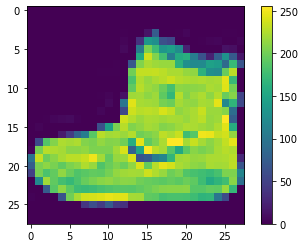

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

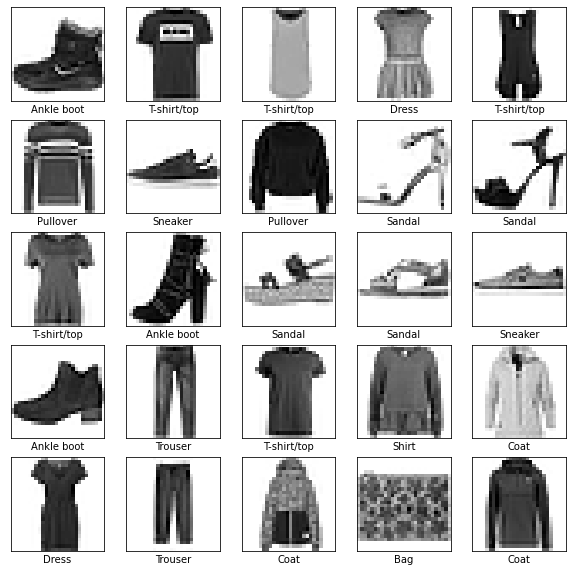

In [6]:
train_images = train_images / 255.0

test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])


In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5054 - accuracy: 0.8215
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3761 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3390 - accuracy: 0.8757
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3141 - accuracy: 0.8850
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2968 - accuracy: 0.8908
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2825 - accuracy: 0.8955
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2696 - accuracy: 0.8999
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2609 - accuracy: 0.9037
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2491 - accuracy: 0.9072
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.239

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

In [10]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3387 - accuracy: 0.8793

Test accuracy: 0.8792999982833862


In [11]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [12]:
predictions = probability_model.predict(test_images)

In [13]:
predictions[0]

array([1.5420002e-06, 1.5129613e-08, 2.0945836e-06, 1.7976089e-07,
       7.7328757e-09, 4.4530560e-03, 1.0457568e-05, 4.0676422e-02,
       5.2553344e-07, 9.5485562e-01], dtype=float32)

In [14]:
np.argmax(predictions[0])

9

In [15]:
test_labels[0]

9

In [16]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

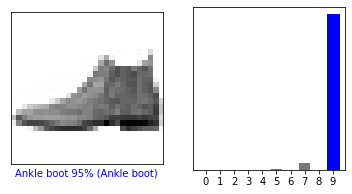

In [17]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

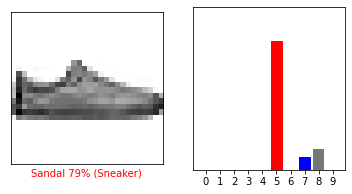

In [18]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

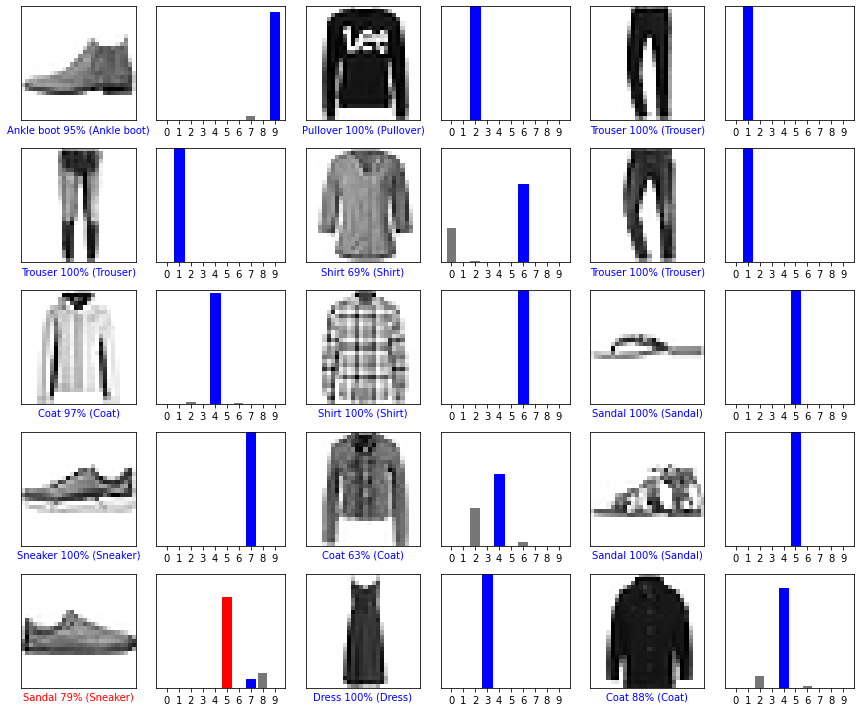

In [19]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [20]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [21]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [22]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.6171416e-05 3.1512117e-12 9.9963987e-01 5.8682392e-11 1.5315601e-04
  1.2513853e-11 1.9074520e-04 2.3494047e-16 2.3639624e-10 9.3758057e-12]]


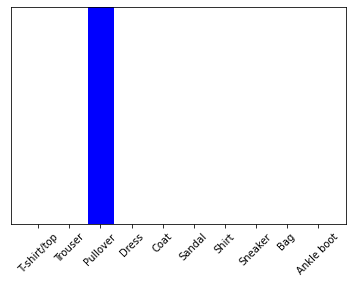

In [23]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [24]:
np.argmax(predictions_single[0])


2

In [25]:
np.argmax(predictions_single[0])

2